In [4]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import named_colors, mpl_loc, fancy_legend, load_mpl_presets
from scipy.integrate import quad
import numpy as np
import math as m
load_mpl_presets()

# How many SN Ia events per unit stellar mass would be expected given an exponential SFH and an exponential DTD?

In my GCE models I usually take a $t^{-1.1}$ power-law DTD, but an exponential with e-folding timescale $\tau_\text{Ia}$ allows analytic solutions to this question. The SN Ia rate given this SFH and DTD, for a minimum delay time $t_\text{D}$ and present-day at time $T$:

$$
\begin{aligned}
\dot{N}_\text{Ia} &= \int_{t_\text{D}}^T \dot{M}_\star(t) R_\text{Ia}(T - t) dt
\\
&= \int_{t_\text{D}}^T \dot{M}_{\star,0} e^{-t/\tau_\text{sfh}}\xi e^{-(T - t)/\tau_\text{Ia}} dt
\\
&= \dot{M}_{\star,0}\xi \int_{t_\text{D}}^T e^{-t/\tau_\text{sfh}}e^{-T/\tau_\text{Ia}}e^{t/\tau_\text{Ia}} dt
\\
&= \dot{M}_{\star,0}\xi e^{-T/\tau_\text{Ia}} 
\int_{t_\text{D}}^T e^{-t(\tau_\text{Ia} - \tau_\text{sfh}) / \tau_\text{Ia}\tau_\text{sfh}} dt
\\
&= \dot{M}_{\star,0}\xi e^{-T/\tau_\text{Ia}} \frac{\tau_\text{Ia}\tau_\text{sfh}}{\tau_\text{sfh} - \tau_\text{Ia}}
e^{-t(\tau_\text{Ia} - \tau_\text{sfh})/\tau_\text{Ia}\tau_\text{sfh}}\Big|_{t_\text{D}}^T
\\
&= \dot{M}_{\star,0}\xi e^{-T/\tau_\text{Ia}} \frac{\tau_\text{Ia}\tau_\text{sfh}}{\tau_\text{sfh} - \tau_\text{Ia}}
\left[e^{-T(\tau_\text{Ia} - \tau_\text{sfh})/\tau_\text{Ia}\tau_\text{sfh}} -
e^{-t_\text{D}(\tau_\text{Ia} - \tau_\text{sfh})/\tau_\text{Ia}\tau_\text{sfh}}\right]
\end{aligned}
$$

where $\dot{M}_{\star,0}$ is the initial height of the SFH at $t = 0$ and $\xi$ is some overall normalizing factor on the SN Ia DTD. The stellar mass:

$$
\begin{aligned}
M_\star &= \int_0^T (1 - r) \dot{M}_\star(t) dt
\\
&= \int_0^T (1 - r) \dot{M}_{\star,0}e^{-t/\tau_\text{sfh}} dt
\\
&= -(1 - r) \dot{M}_{\star,0} \tau_\text{sfh}e^{-t/\tau_\text{sfh}}\Big|_0^T
\\
&= -(1 - r) \dot{M}_{\star,0} \tau_\text{sfh}\left[e^{-T/\tau_\text{sfh}} - 1\right]
\\
&= (1 - r) \dot{M}_{\star,0} \tau_\text{sfh}\left[1 - e^{-T/\tau_\text{sfh}}\right]
\end{aligned}
$$

where $r$ is the recycling fraction ($r \approx 0.4$ for a Kroupa IMF). This assumes instantaneous recycling, which is a relatively good approximation - massive stars return their envelopes quickly, after which the full time-dependent recycling rate slows down considerably due to the lifetimes of lower mass stars. Taking into account time-dependent recycling would require a numerical calculation, but I would expect it to affect the computed specific Ia rates only at the $\sim$10% level.

Taking the ratio of the two, the normalization of the SFH and the e-folding timescale $\tau_\text{sfh}$ cancel:

$$
\begin{aligned}
\frac{\dot{N}_\text{Ia}}{M_\star} &= (1 - r)\xi e^{-T/\tau_\text{Ia}}
\frac{\tau_\text{Ia}}{\tau_\text{sfh} - \tau_\text{Ia}}
\left[e^{-T(\tau_\text{Ia} - \tau_\text{sfh})/\tau_\text{Ia}\tau_\text{sfh}} -
e^{-t_\text{D}(\tau_\text{Ia} - \tau_\text{sfh})/\tau_\text{Ia}\tau_\text{sfh}}\right]
\left[1 - e^{-T/\tau_\text{sfh}}\right]^{-1}
\\
&\sim e^{-T/\tau_\text{Ia}}
\frac{\tau_\text{Ia}}{\tau_\text{sfh} - \tau_\text{Ia}}
\left[e^{-T(\tau_\text{Ia} - \tau_\text{sfh})/\tau_\text{Ia}\tau_\text{sfh}} -
e^{-t_\text{D}(\tau_\text{Ia} - \tau_\text{sfh})/\tau_\text{Ia}\tau_\text{sfh}}\right]
\left[1 - e^{-T/\tau_\text{sfh}}\right]^{-1}
\end{aligned}
$$

For the last line I simply ignore the normalization as only the trend of $\dot{N}_\text{Ia}/M_\star$ with $\tau_\text{sfh}$ is relevant. The value of $\xi$ could be calculated by taking in a time-integrated value from a previous study on the SN Ia DTD (e.g. $\sim2.2$ SN per 1000 $M_\odot$ of star formation over the duty cycle of the DTD - [Maoz & Mannucci 2012](https://ui.adsabs.harvard.edu/abs/2012PASA...29..447M/abstract)).

Typical values for these numbers are $\tau_\text{Ia} = 1.5$ Gyr, $t_\text{D} = 150$ Myr, and $T = 13.7$ Gyr.

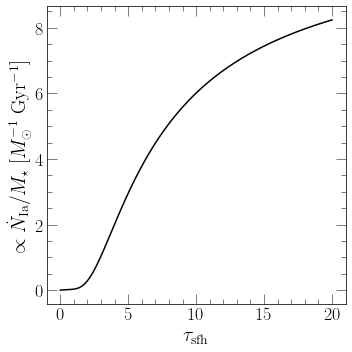

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$\tau_\text{sfh}$")
ax.set_ylabel(r"$\propto \dot{N}_\text{Ia}/M_\star$ [$M_\odot^{-1}$ Gyr$^{-1}$]")

def specia(tausfh, tauia = 1.5, td = 0.15, T = 13.7):
    specia_ = m.exp(-T / tauia)
    specia_ *= tauia / (tausfh - tauia)
    specia_ *= (
        m.exp(-T * (tauia - tausfh) / (tauia * tausfh)) -
        m.exp(-td * (tauia - tausfh) / (tauia * tausfh))
    )
    specia_ /= 1 - m.exp(-T / tausfh)
    return specia_

xvals = np.linspace(0.01, 20, 1000)
yvals = [100 * specia(_) for _ in xvals]
ax.plot(xvals, yvals, c = named_colors()["black"])

plt.tight_layout()
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("iarate_vs_tausfh.%s" % (ext), **kwargs)
plt.show()

In [8]:
A = 100
T = 13.2

def mdotstar(tau, tausfh):
    return A * (T - tau) * m.exp(-(T - tau) / tausfh)

def dtd(tau, delay = 0.1):
    if tau < delay:
        return 0
    else:
        return tau**(-1)

def ndotia_integrand(tau, tausfh, delay = 0.1):
    return mdotstar(tau, tausfh) * dtd(tau, delay = delay)

def ndotia(tausfh = 5, delay = 0.1):
    return quad(ndotia_integrand, 0, T, args = (tausfh, ))[0]

def mstar(tausfh = 5):
    return quad(mdotstar, 0, T, args = (tausfh, ))[0]

/home/johnson.7419/tmp/ipykernel_32687/2245439415.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  return A * (T - tau) * m.exp(-(T - tau) / tausfh)


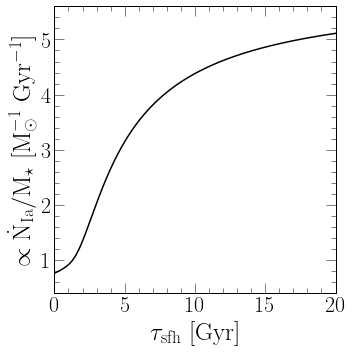

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$\tau_\text{sfh}$ [Gyr]", fontsize = 25)
ax.set_ylabel(r"$\propto \dot{\text{N}}_\text{Ia} / \text{M}_\star$ [M$_\odot^{-1}$ Gyr$^{-1}$]", fontsize = 25)
ax.set_xlim([0, 20])
ax.set_ylim([0.4, 5.6])
ax.tick_params(labelsize = 22)

xvals = np.linspace(0, 20, 1001)
yvals = []
for i in range(len(xvals)):
    numerator = ndotia(tausfh = xvals[i])
    denominator = mstar(tausfh = xvals[i])
    if denominator:
        yvals.append(10 * numerator / denominator)
    else:
        yvals.append(float("nan"))
ax.plot(xvals, yvals, c = named_colors()["black"])

plt.tight_layout()
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("../paper/iarate_vs_tausfh.%s" % (ext), **kwargs)
plt.show()